# Load Data

In [1]:
import pandas as pd
from mmcv import Config
from utils import *
import numpy as np

#the config file has 
config_path = '/Users/KC/My Drive/soundmouse/config/cfg_setting.py'
cfg = Config.fromfile(config_path)
df = pd.read_csv(cfg.filepath_load)
df.head()


,id,name,artists,duration_ms,popularity,release_date,tempo,key,liveness
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",831667,4,1921,80.954,10,0.665
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,['Dennis Day'],180533,5,1921,60.936,7,0.160
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,500062,5,1921,110.339,3,0.101
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,['Frank Parker'],210000,3,1921,100.109,5,0.381
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,['Phil Regan'],166693,2,1921,101.665,3,0.229


In [31]:
#data preparation and preprocessiong                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
print('is there null value?:\n', df.isna().sum()) # check null values

is there null value?:
 id              0
name            0
artists         0
duration_ms     0
popularity      0
release_date    0
tempo           0
key             0
liveness        0
dtype: int64


In [35]:
print(df['id'].shape)
print(df['id'].unique().shape)


(99999,)
(99999,)


Get info of the Spotify feature

In [2]:
#connect to spotify api
sp = spotify_api(cfg)

In [3]:
#print spotify api info.
track_id = '1aIcPHRxqEgQWS7diagkF5'

#spotify audio
fts = sp.audio_features(track_id)
tra= sp.track(track_id)

#print out a example of the audio_feature function
print('\naudio feature: ',fts[0])
print('\naudio feature keys: ',fts[0].keys())

#print out a example of the track function
print('\nname: ',tra['name']) 
print('\nsample: ', tra['preview_url'])
print('\ntrack keys: ', tra.keys())
print('\ntrack preview_url: ', tra['preview_url'])
print('\ntrack name: ', tra['name'])


audio feature:  {'danceability': 0.377, 'energy': 0.185, 'key': 6, 'loudness': -21.808, 'mode': 1, 'speechiness': 0.0334, 'acousticness': 0.98, 'instrumentalness': 0.92, 'liveness': 0.926, 'valence': 0.0387, 'tempo': 101.696, 'type': 'audio_features', 'id': '1aIcPHRxqEgQWS7diagkF5', 'uri': 'spotify:track:1aIcPHRxqEgQWS7diagkF5', 'track_href': 'https://api.spotify.com/v1/tracks/1aIcPHRxqEgQWS7diagkF5', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1aIcPHRxqEgQWS7diagkF5', 'duration_ms': 296133, 'time_signature': 4}

audio feature keys:  dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

name:  April In Paris - Original Edited Concert - Live at Sunset School, Carmel-by-the-Sea, CA, September 1955

sample:  https://p.scdn.co/mp3-preview/b01f89a89c9823936f36312a9ae992350f0ecf92?cid=f0967aa1c7064a3

In [4]:
test=sp.audio_analysis(track_id)

In [5]:
test

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1444977392,
  'analysis_time': 10.32147,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 6529740,
  'duration': 296.13333,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.0,
  'start_of_fade_out': 296.13333,
  'loudness': -21.808,
  'tempo': 101.696,
  'tempo_confidence': 0.159,
  'time_signature': 4,
  'time_signature_confidence': 0.773,
  'key': 6,
  'key_confidence': 0.358,
  'mode': 1,
  'mode_confidence': 0.482,
  'codestring': 'eJxVm4exJTcMBFPZEOhN_ompe_i-VLqqO2m5hiQIDAbmjd5GP-vsr3yjz3lqH_3r7Xc1Rm3f3OtbfZ7Fo_W77Xhv78ufr9Yzvlnm6bfe89V1l3fX7KX1r542vnrnWGXu87VRipetrVLn1844fni1vctyUmdtq48y2tdX9VPMOU_JR9u365yz1t6-MU7hA_3U0X1tr_PNttZqvWZBfI-P8o2xvtnZxW2trNJYxpyd7826z6ntfnMt3lgso6_Vv8n6vl7uqmWXb7XCrso4Z58-vzXY35lzs8TBpTuoCI1vI4ftDg7LGGs

create audio feature file as .csv file

In [6]:
# create_feat_file(cfg, df, sp, filename='test.csv', return_value=False)

load audio feature file from saved file

In [7]:
filename = 'audio_feats.csv'
path = cfg.filepath_save + filename

#df2 is audio_feature data downloaded from spotify api
df2 = pd.read_csv(path)

In [8]:
df2['name'] = df['name']
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.279,0.211,10,-20.096,1,0.0366,0.982,0.878000,0.665,0.0594,80.954,audio_features,4BJqT0PrAfrxzMOxytFOIz,spotify:track:4BJqT0PrAfrxzMOxytFOIz,https://api.spotify.com/v1/tracks/4BJqT0PrAfrx...,https://api.spotify.com/v1/audio-analysis/4BJq...,831667,4,"Piano Concerto No. 3 in D Minor, Op. 30: III. ..."
1,0.819,0.341,7,-12.441,1,0.4150,0.732,0.000000,0.160,0.9630,60.936,audio_features,7xPhfUan2yNtyFG0cUWkt8,spotify:track:7xPhfUan2yNtyFG0cUWkt8,https://api.spotify.com/v1/tracks/7xPhfUan2yNt...,https://api.spotify.com/v1/audio-analysis/7xPh...,180533,4,Clancy Lowered the Boom
2,0.328,0.166,3,-14.850,1,0.0339,0.961,0.913000,0.101,0.0394,110.339,audio_features,1o6I8BglA6ylDMrIELygv1,spotify:track:1o6I8BglA6ylDMrIELygv1,https://api.spotify.com/v1/tracks/1o6I8BglA6yl...,https://api.spotify.com/v1/audio-analysis/1o6I...,500062,4,Gati Bali
3,0.275,0.309,5,-9.316,1,0.0354,0.967,0.000028,0.381,0.1650,100.109,audio_features,3ftBPsC5vPBKxYSee08FDH,spotify:track:3ftBPsC5vPBKxYSee08FDH,https://api.spotify.com/v1/tracks/3ftBPsC5vPBK...,https://api.spotify.com/v1/audio-analysis/3ftB...,210000,3,Danny Boy
4,0.418,0.193,3,-10.096,1,0.0380,0.957,0.000002,0.229,0.2530,101.665,audio_features,4d6HGyGT8e121BsdKmw9v6,spotify:track:4d6HGyGT8e121BsdKmw9v6,https://api.spotify.com/v1/tracks/4d6HGyGT8e12...,https://api.spotify.com/v1/audio-analysis/4d6H...,166693,4,When Irish Eyes Are Smiling


In [9]:
# df['liveness'].describe()
mean = df['liveness'].mean()
std = df['liveness'].std()
print((0.8 - mean)/std)

3.6197657012988063


To label live music, "live" word was detected by regular expression.<br>

Examples are shown as follows:

In [10]:
import re
strs = ['How High the Moon - Live','Don Giovanni, K. 527, Act I: Giovinette, che fate all\'amore (Live)',
        'Quicksilver - Live At Birdland, New York/1954','Skin Deep - Live','Real Live Girl',
        'Nothing Was Delivered', 'The Eleven - Live in San Francisco, 1969; 2001 Remaster',
        'A Man A City (live at the Fillmore West) [Bonus Track]', 'Got My Mojo Working - Pt. 2 / Live At Newport Jazz Festival, 1960',
        'C\'mon And Love Me - Live/1975']
print(strs,'\n')

for i, str in enumerate(strs):
    tokens = re.findall(r'([-/] [Ll]ive|\([Ll]ive\))', str)
    print(i,': ',str)
    if tokens:
        print(tokens, ' found!!')
    else:
        print('There is no matching words')
    


['How High the Moon - Live', "Don Giovanni, K. 527, Act I: Giovinette, che fate all'amore (Live)", 'Quicksilver - Live At Birdland, New York/1954', 'Skin Deep - Live', 'Real Live Girl', 'Nothing Was Delivered', 'The Eleven - Live in San Francisco, 1969; 2001 Remaster', 'A Man A City (live at the Fillmore West) [Bonus Track]', 'Got My Mojo Working - Pt. 2 / Live At Newport Jazz Festival, 1960', "C'mon And Love Me - Live/1975"] 

0 :  How High the Moon - Live
['- Live']  found!!
1 :  Don Giovanni, K. 527, Act I: Giovinette, che fate all'amore (Live)
['(Live)']  found!!
2 :  Quicksilver - Live At Birdland, New York/1954
['- Live']  found!!
3 :  Skin Deep - Live
['- Live']  found!!
4 :  Real Live Girl
There is no matching words
5 :  Nothing Was Delivered
There is no matching words
6 :  The Eleven - Live in San Francisco, 1969; 2001 Remaster
['- Live']  found!!
7 :  A Man A City (live at the Fillmore West) [Bonus Track]
There is no matching words
8 :  Got My Mojo Working - Pt. 2 / Live At N

labelling live music based on the name including "live" 

In [11]:
df2 = detect_live_in_name(df2)

/Users/KC/My Drive/soundmouse/utils/utils.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['live'][i] = 1


Normalising numeric data (standardisation)

In [12]:
for i, col in enumerate(cfg.normalised_cols):
    df2[col]=normalisation(df2[col])

In [13]:
df2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name,live
0,-1.509609,-0.950819,1.371512,-1.484222,0.640996,-0.381994,1.196042,2.235733,2.802696,-1.827616,-1.154106,audio_features,4BJqT0PrAfrxzMOxytFOIz,spotify:track:4BJqT0PrAfrxzMOxytFOIz,https://api.spotify.com/v1/tracks/4BJqT0PrAfrx...,https://api.spotify.com/v1/audio-analysis/4BJq...,4.978012,0.292319,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0
1,1.588714,-0.458713,0.515464,-0.133135,0.640996,1.764213,0.532930,-0.538791,-0.250113,1.637829,-1.805774,audio_features,7xPhfUan2yNtyFG0cUWkt8,spotify:track:7xPhfUan2yNtyFG0cUWkt8,https://api.spotify.com/v1/tracks/7xPhfUan2yNt...,https://api.spotify.com/v1/audio-analysis/7xPh...,-0.384110,0.292319,Clancy Lowered the Boom,0
2,-1.228465,-1.121164,-0.625932,-0.558317,0.640996,-0.397308,1.140341,2.346335,-0.606778,-1.904319,-0.197504,audio_features,1o6I8BglA6ylDMrIELygv1,spotify:track:1o6I8BglA6ylDMrIELygv1,https://api.spotify.com/v1/tracks/1o6I8BglA6yl...,https://api.spotify.com/v1/audio-analysis/1o6I...,2.247228,0.292319,Gati Bali,0
3,-1.532560,-0.579847,-0.055234,0.418419,0.640996,-0.388801,1.156256,-0.538704,1.085869,-1.422624,-0.530532,audio_features,3ftBPsC5vPBKxYSee08FDH,spotify:track:3ftBPsC5vPBKxYSee08FDH,https://api.spotify.com/v1/tracks/3ftBPsC5vPBK...,https://api.spotify.com/v1/audio-analysis/3ftB...,-0.141447,-1.633903,Danny Boy,0
4,-0.712078,-1.018957,-0.625932,0.280751,0.640996,-0.374054,1.129731,-0.538786,0.167003,-1.085130,-0.479878,audio_features,4d6HGyGT8e121BsdKmw9v6,spotify:track:4d6HGyGT8e121BsdKmw9v6,https://api.spotify.com/v1/tracks/4d6HGyGT8e12...,https://api.spotify.com/v1/audio-analysis/4d6H...,-0.498083,0.292319,When Irish Eyes Are Smiling,0


correlation heatmap

<AxesSubplot:>

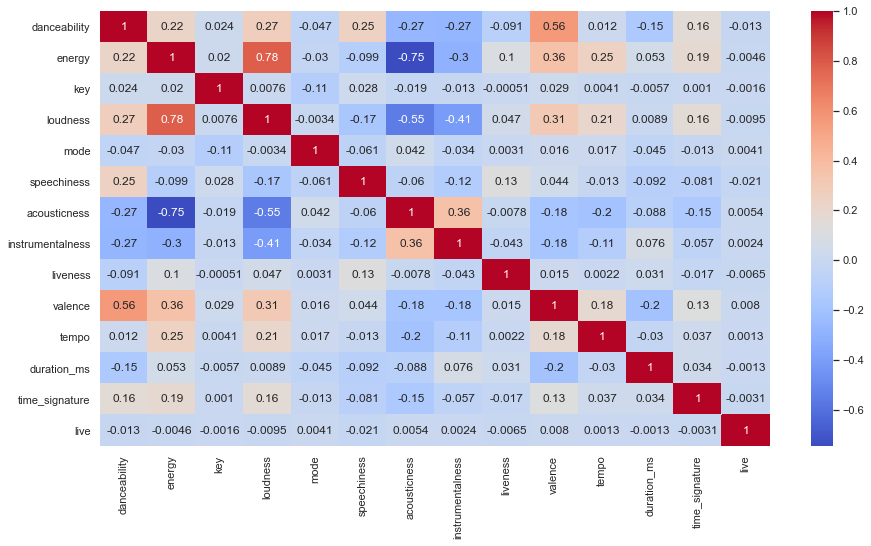

In [14]:
matplotlib.rcParams['figure.figsize'] = [15, 8]
sns.set(style='whitegrid')
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Print out the number of live music or non live music

In [15]:
fprint('total num', df2['live'].shape[0])
fprint('live music num', df2['live'].sum())
fprint('non live music num', df2['live'].shape[0]-df2['live'].sum())

total num           : 99000 
live music num      : 1506 
non live music num  : 97494 


In [16]:
live = df2[(df2['live'] == 1)]

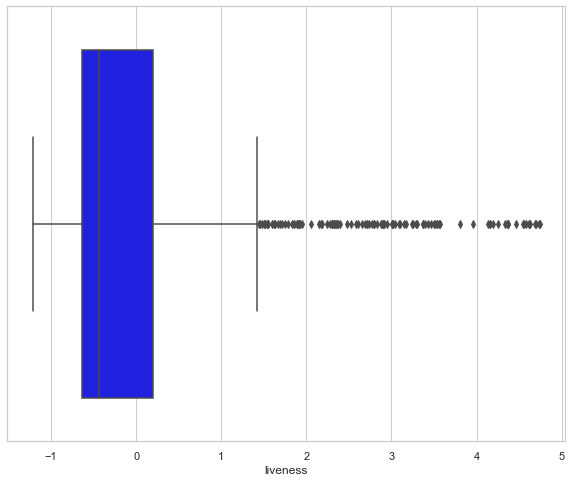

In [17]:
plot(df=live, x='liveness', plot_type='boxplot')

Examining a distribution of the liveness value

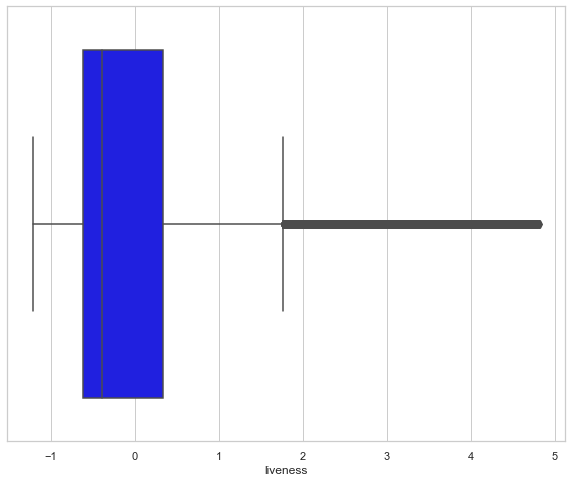

In [18]:
plot(df=df2, x='liveness', plot_type='boxplot')

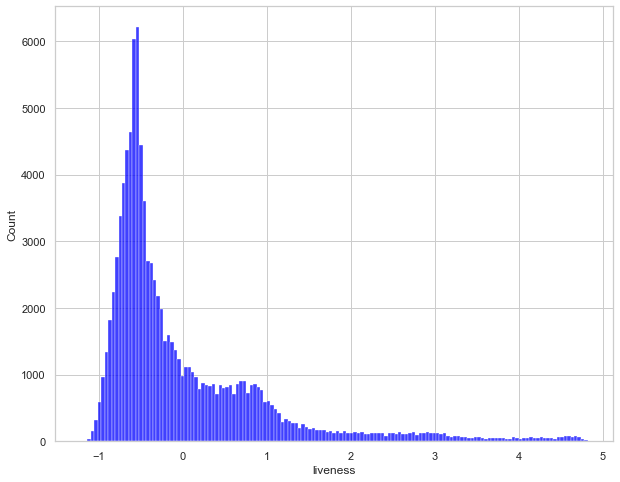

In [19]:
plot(df=df2, x='liveness', plot_type='histplot')

Various info about liveness is shown as follows:

In [20]:
df_print_info(df2, item='liveness')

[max/min/mean  ]----------------------------------------
liveness max  : 4.8217818995868384 
liveness min  : -1.2173400946427995 
liveness mean : 4.705697111434705e-15 
[quantile      ]----------------------------------------
0.05   -0.854026
0.25   -0.617660
0.50   -0.395197
0.75    0.336268
0.95    2.216315
Name: liveness, dtype: float64


In [21]:
def fprint(item, value):
    print('{:30}: {} '.format(item, value))
Q1 = df2['liveness'].quantile(0.25)
Q2 = df2['liveness'].quantile(0.5)
Q3 = df2['liveness'].quantile(0.75)
IQR = Q3 - Q1
fprint('Q1', Q1)
fprint('Q2', Q2)
fprint('Q3', Q3)
fprint('IQR', IQR)
fprint('(Q1-1.5*IQR)', Q1-1.5*IQR)
fprint('(Q3+1.5*IQR)', Q3+1.5*IQR)
fprint('outlier [<(Q1-1.5*IQR)]', df2[(df2['liveness']<(Q1-1.5*IQR)) & (df2['live']==1)].shape[0])
fprint('outlier [>(Q3+1.5*IQR)]', df2[(df2['liveness']>(Q3+1.5*IQR)) & (df2['live']==0)].shape[0])
fprint('outlier [<(Q1)]', df2[(df2['liveness']<(Q1)) & (df2['live']==1)].shape[0])
fprint('outlier [>(Q3)]', df2[(df2['liveness']>(Q3)) & (df2['live']==0)].shape[0])
# fprint('liveness > q0.95 & non live',df2[(df2['liveness']>2.216) & (df2['live']==0)].shape[0])
# fprint('liveness > q0.5 & non live',df2[(df2['liveness']>-0.3951) & (df2['live']==0)].shape[0])
# fprint('liveness < q0.05 & live',df2[(df2['liveness']<-0.8540) & (df2['live']==1)].shape[0])

Q1                            : -0.6176595122328093 
Q2                            : -0.3951973606936194 
Q3                            : 0.3362678658346951 
IQR                           : 0.9539273780675044 
(Q1-1.5*IQR)                  : -2.0485505793340657 
(Q3+1.5*IQR)                  : 1.7671589329359516 
outlier [<(Q1-1.5*IQR)]       : 0 
outlier [>(Q3+1.5*IQR)]       : 6319 
outlier [<(Q1)]               : 416 
outlier [>(Q3)]               : 24331 


In [22]:
df2['liveness'].describe()

count    9.900000e+04
mean     4.705697e-15
std      1.000000e+00
min     -1.217340e+00
25%     -6.176595e-01
50%     -3.951974e-01
75%      3.362679e-01
max      4.821782e+00
Name: liveness, dtype: float64

This is criterion regarding which data is considered as outliers.

In [23]:
lower = Q1
upper = Q3
df2['outlier'] = np.where((df2['liveness']<(lower)) & (df2['live']==1) | (df2['liveness']>(upper)) & (df2['live']==0), 1, 0 )

fprint('the no. of outliers',df2['outlier'].sum())

the no. of outliers           : 24747 


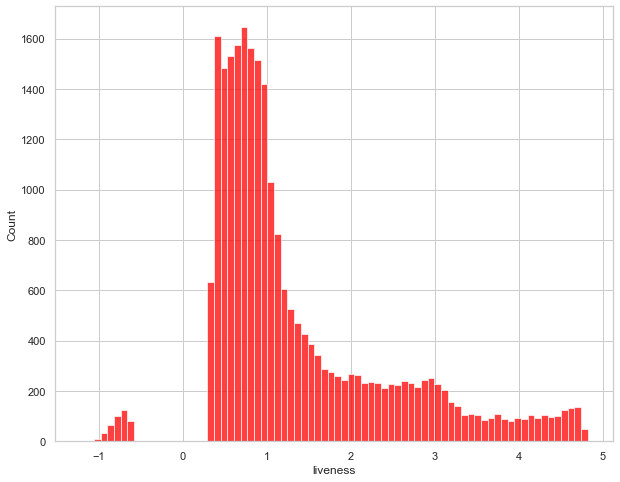

In [24]:
outlier= df2[(df2['outlier']==1)]
nonoutlier= df2[(df2['outlier']==0)]
live = df2[(df2['live']==1)]
nonlive = df2[(df2['live']==0)]


plot(df=outlier, x='liveness', plot_type='histplot', color='red')

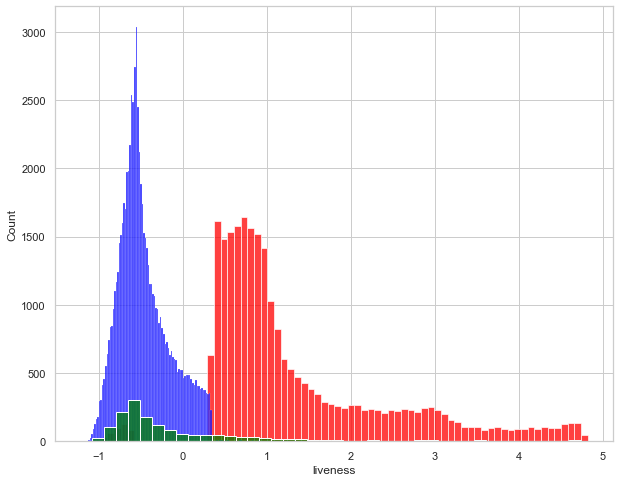

In [25]:
plot(df=outlier, x='liveness', plot_type='histplot', color='red')
plot(df=nonoutlier, x='liveness', plot_type='histplot', color='blue')
plot(df=live, x='liveness', plot_type='histplot', color='green')
# plot(df=nonlive, x='liveness', plot_type='histplot', color='yellow')

data columns were selected for model input data.

In [26]:
selected_cols = cfg.selected_cols
data = df2[selected_cols]
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,live,outlier
0,-1.509609,-0.950819,1.371512,-1.484222,0.640996,-0.381994,1.196042,2.235733,2.802696,-1.827616,-1.154106,4.978012,0.292319,0,1
1,1.588714,-0.458713,0.515464,-0.133135,0.640996,1.764213,0.532930,-0.538791,-0.250113,1.637829,-1.805774,-0.384110,0.292319,0,0
2,-1.228465,-1.121164,-0.625932,-0.558317,0.640996,-0.397308,1.140341,2.346335,-0.606778,-1.904319,-0.197504,2.247228,0.292319,0,0
3,-1.532560,-0.579847,-0.055234,0.418419,0.640996,-0.388801,1.156256,-0.538704,1.085869,-1.422624,-0.530532,-0.141447,-1.633903,0,1
4,-0.712078,-1.018957,-0.625932,0.280751,0.640996,-0.374054,1.129731,-0.538786,0.167003,-1.085130,-0.479878,-0.498083,0.292319,0,0


In [27]:
#check types
data.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
live                  int64
outlier               int64
dtype: object

In [28]:
#data preparation and preprocessiong                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
print('is there null value?:\n', data.isna().sum()) # check null values

is there null value?:
 danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
live                0
outlier             0
dtype: int64


In [29]:
write_df(cfg, data, "data.csv")

data.csv  file created at  /Users/KC/My Drive/soundmouse/data/data.csv
